In [165]:
import sys

sys.path.insert(1, '../..')

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from functions.other_functions import process_date
import scipy.integrate as integrate
import csv
import ROOT
import time
%matplotlib inline 

In [166]:
def linear_voltage(r, V0, d):
    return V0*r/d

def non_linear_voltage(r, V0, d):
    return V0*(r/d)**2
    
def xsec(x, A, B):
    return (A*np.log(x) + B)/x

def poly(x,A,B,C,D):
    return A*x**3 + B*x**2 + C*x + D

def xsec_integrand(x, A, B):
    return (A*np.log(x) + B)

def chi2(y_obs, y_exp, y_err, Ndof):
    return np.sum(((y_obs - y_exp)/y_err)**2)/Ndof

In [60]:
d = 0.1   # distance from cathode to anode
V0 = 650  # PMT total voltage
e = 1.60217662e-19

In [167]:
energy = []
xsection = []
xsection_err = []

with open('/Users/williamquinn/Documents/PhD/PMT-ShapeAnalysis/pmt_he_study/summary_files/electron_xsections.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            energy.append(float(row[0]))
            xsection.append(float(row[1])*1e-17)
            xsection_err.append(float(row[2])*1e-17)
            print(f'\t{row[0]} : {row[1]} ± {row[2]}')
            line_count += 1
    print(f'Processed {line_count} lines.')
    
energy = np.array(energy)
xsection = np.array(xsection)
xsection_err = np.array(xsection_err)

Column names are ﻿Energy /eV, He+ cross-section /10e-17 cm2, error
	26.6 : 0.242 ± 0.008
	27.6 : 0.366 ± 0.009
	28.6 : 0.48 ± 0.013
	29.6 : 0.604 ± 0.012
	30.6 : 0.715 ± 0.016
	32.1 : 0.871 ± 0.022
	33.6 : 1.05 ± 0.03
	38.6 : 1.52 ± 0.03
	43.6 : 1.9 ± 0.03
	48.6 : 2.26 ± 0.05
	53.6 : 2.5 ± 0.04
	58.6 : 2.73 ± 0.06
	68.6 : 3.05 ± 0.07
	78.6 : 3.29 ± 0.06
	88.6 : 3.45 ± 0.06
	90.2 : 3.53 ± 0.05
	95.2 : 3.6 ± 0.05
	100 : 3.67 ± 0.08
	105 : 3.74 ± 0.09
	110 : 3.7 ± 0.05
	115 : 3.67 ± 0.05
	120 : 3.7 ± 0.04
	130 : 3.69 ± 0.05
	140 : 3.67 ± 0.04
	150 : 3.6 ± 0.04
	160 : 3.58 ± 0.04
	170 : 3.55 ± 0.05
	195 : 3.42 ± 0.05
	220 : 3.25 ± 0.04
	250 : 3.13 ± 0.04
	280 : 2.89 ± 0.03
	325 : 2.65 ± 0.03
	375 : 2.53 ± 0.03
	430 : 2.32 ± 0.03
	500 : 2.09 ± 0.03
	570 : 1.87 ± 0.02
	650 : 1.77 ± 0.02
	750 : 1.61 ± 0.02
	870 : 1.44 ± 0.02
	1000 : 1.28 ± 0.02
	1150 : 1.19 ± 0.02
	1320 : 1.07 ± 0.02
	1520 : 0.955 ± 0.012
	1750 : 0.872 ± 0.01
	2010 : 0.796 ± 0.009
	2300 : 0.693 ± 0.008
	2650 : 0.615 ± 0.009
	

In [168]:
double_energy = []
double_xsection = []
double_xsection_err = []

with open('/Users/williamquinn/Documents/PhD/PMT-ShapeAnalysis/pmt_he_study/summary_files/electron_double_xsections.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            double_energy.append(float(row[0]))
            double_xsection.append(float(row[1])*1e-19)
            double_xsection_err.append(float(row[2])*1e-19)
            print(f'\t{row[0]} : {row[1]} ± {row[2]}')
            line_count += 1
    print(f'Processed {line_count} lines.')
    
double_energy = np.array(double_energy)
double_xsection = np.array(double_xsection)
double_xsection_err = np.array(double_xsection_err)

Column names are ﻿Energy /eV, double He+ cross-section /10e-19 cm2, error, 
	90.2 : 0.063 ± 0.012
	95.2 : 0.095 ± 0.013
	100 : 0.172 ± 0.025
	105 : 0.255 ± 0.02
	110 : 0.302 ± 0.015
	115 : 0.388 ± 0.025
	120 : 0.439 ± 0.031
	130 : 0.561 ± 0.03
	140 : 0.748 ± 0.04
	150 : 0.806 ± 0.036
	160 : 0.864 ± 0.036
	170 : 0.937 ± 0.045
	195 : 1.16 ± 0.05
	220 : 1.23 ± 0.04
	250 : 1.32 ± 0.04
	280 : 1.35 ± 0.06
	325 : 1.31 ± 0.06
	375 : 1.33 ± 0.04
	430 : 1.23 ± 0.05
	500 : 1.16 ± 0.05
	570 : 0.99 ± 0.04
	650 : 0.896 ± 0.027
	750 : 0.836 ± 0.025
	870 : 0.696 ± 0.036
	1000 : 0.597 ± 0.015
	1150 : 0.54 ± 0.018
	1320 : 0.453 ± 0.025
	1520 : 0.403 ± 0.015
	1750 : 0.363 ± 0.026
	2010 : 0.313 ± 0.017
	2300 : 0.259 ± 0.009
	2650 : 0.218 ± 0.006
	3000 : 0.187 ± 0.006
	3500 : 0.176 ± 0.01
	4000 : 0.142 ± 0.003
	4600 : 0.122 ± 0.005
	5300 : 0.102 ± 0.006
	6100 : 0.087 ± 0.003
	7000 : 0.073 ± 0.002
	8000 : 0.068 ± 0.003
	9000 : 0.059 ± 0.003
	10000 : 0.051 ± 0.003
Processed 43 lines.


/Users/williamquinn/opt/anaconda3/envs/my_root_env/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(1.5269679167820097e-14, 1.0570061985139408e-17)
[ 4.94298350e-15 -2.46504287e+01 -3.93192068e+00]
[1.25263365e-15 1.00000000e+00]
[ 2.99104719e-17 -1.07180963e+00 -4.56189848e+00]
1.5269679177697973e-14


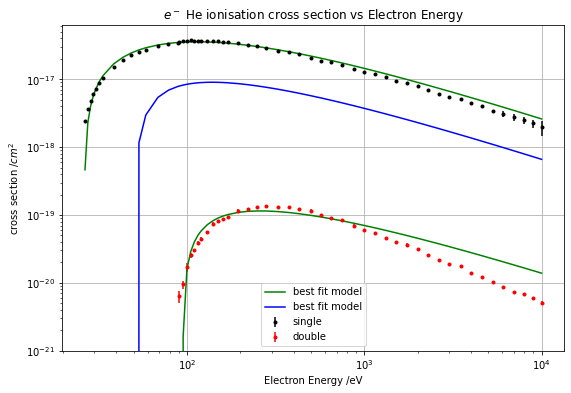

In [204]:
def plot(x, A, B, C, D, E, F, G):
    return (A * x**5) + (B * x**4) + (D * x**3) +  (E * x**2) + (F * x**1) + G

def func(x, A, B, C):
    return A*(np.log(x - B) + C)/(x-B)

def func_(x, A, B, C):
    x_ = 588*(x/0.1)**2
    return A*(np.log(x_ - B) + C)/(x_-B)

def new_func(x, A, B):
    return A*(np.log(x) + C)/x

def func_integrand(x, A, B, C, x0, x1):
    return A*np.log((x1-B)/(x0-B))*(0.5*np.log((x1-B)*(x0-B)) + C)

popt, pcov = curve_fit(f=func, xdata=energy, ydata=xsection, maxfev=10000)
popt_, pcov_ = curve_fit(f=new_func, xdata=energy, ydata=xsection, maxfev=100000)
popt_d, pcov_d = curve_fit(f=func, xdata=double_energy, ydata=double_xsection, maxfev=10000)

plt.figure(figsize=(9,6))
plt.errorbar(energy,xsection,xsection_err, fmt='k.', label="single")
plt.plot(energy, func(energy, *popt), 'g-', label = 'best fit model')
plt.plot(energy, new_func(energy, *popt_), 'b-', label = 'best fit model')
plt.errorbar(double_energy,double_xsection,double_xsection_err, fmt='r.', label="double")
plt.plot(double_energy, func(double_energy, *popt_d), 'g-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Electron Energy /eV')
plt.ylabel(r'cross section /$cm^2$')
plt.title(r'$e^-$ He ionisation cross section vs Electron Energy')
plt.grid()
plt.legend(loc='best')

print(integrate.quad(func, 24.587, 588, args=(popt[0], popt[1], popt[2])))

print(popt)
print(popt_)
print(popt_d)
print(func_integrand(energy, *popt, 24.587, 588))
# I = func_integrand(energy, *popt, 24.587, 588)

# plt.savefig("/Users/williamquinn/Desktop/xsec_energy.pdf")

In [193]:
V = (4*np.pi/3)*((0.0254*4)**3)
T = 293
k = 1.38064852e-23
V_0 = 588
d = 0.1
E_0 = 24.587
E_1 = V_0
x_0 = d*np.sqrt(E_0/V_0)
x_1 = d
A = popt[0]
B = popt[1]
C = popt[2]

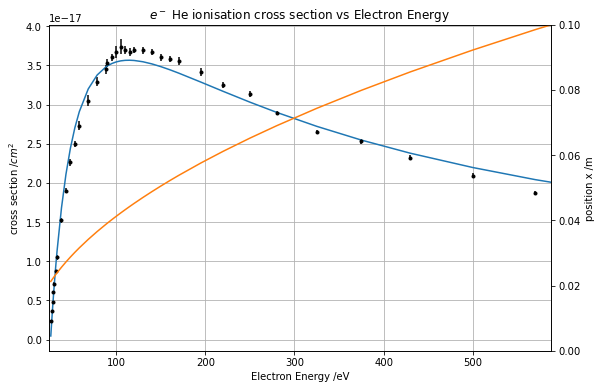

In [187]:
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(energy, func(energy, *popt))
ax.errorbar(energy,xsection,xsection_err, fmt='k.', label="single")
ax.set_xlabel('Electron Energy /eV')
ax.set_ylabel(r'cross section /$cm^2$')
ax.set_title(r'$e^-$ He ionisation cross section vs Electron Energy')
ax.set_xlim(E_0,E_1)
ax.grid()

x = d*np.sqrt(energy/V_0)

ax2 = ax.twinx()
ax2.set_ylabel('position x /m')
ax2.set_ylim(0,d)
ax2.plot(energy, x, 'C1')

(2.1740789046863226e-18, 3.6595801509615995e-27)


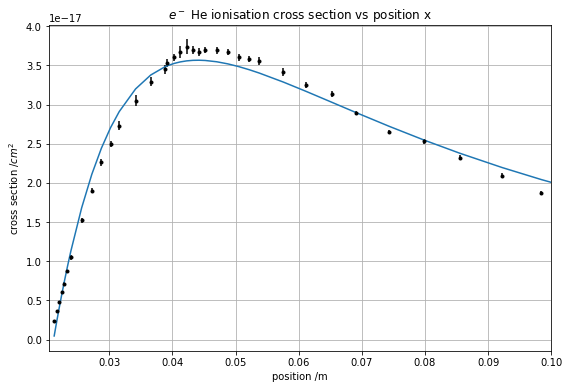

In [207]:
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(x, func_(x, *popt))
ax.errorbar(x,xsection,xsection_err, fmt='k.', label="single")
ax.set_xlabel('position /m')
ax.set_ylabel(r'cross section /$cm^2$')
ax.set_title(r'$e^-$ He ionisation cross section vs position x')
ax.set_xlim(x_0,x_1)
ax.grid()
I,_ = integrate.quad(func_, x_0, x_1, args=(A, B, C))
print(integrate.quad(func_, x_0, x_1, args=(A, B, C)))

$ N = n_{p.e}\frac{p_i}{kT}\int_{x_0}^{d}\frac{A\big(\ln(V_0\big(\frac{x}{d}\big)^2 - B) + C\big)}{V_0\big(\frac{x}{d}\big)^2}dx$


In [209]:
print(I/(k*T)/1000000)

0.0005374332723808467


Text(0.5, 0, 'Distance r/d')

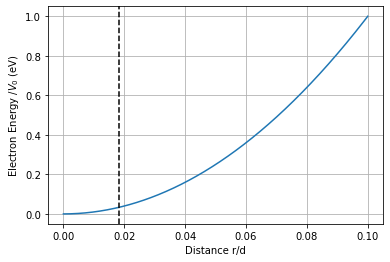

In [173]:

x = np.linspace(0,d,1000)
y_1 = linear_voltage(x,1,d)
y_2 = non_linear_voltage(x,1,d)

#plt.plot(x,y_1)
plt.plot(x,y_2)
plt.axvline(np.sqrt(d/3)*d, 0, 1400, ls='--', color='k')
#plt.axvline(0.5,0,1400,ls='--',color='k')
plt.grid()
plt.ylabel(r'Electron Energy /$V_0$ (eV)')
plt.xlabel('Distance r/d')
# plt.savefig("/Users/willquinn/Desktop/e_energy_vs_distance.pdf")


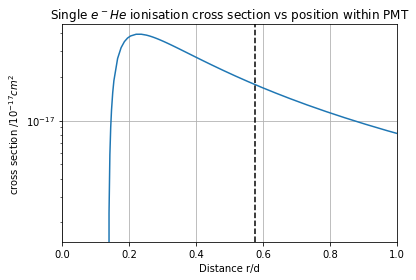

In [37]:
plt.plot(d*np.sqrt(energy/V0),xsec(energy,*popt))
plt.xlim(0,1)
plt.ylabel(r'cross section /$10^{-17} cm^2$')
plt.grid()
plt.xlabel('Distance r/d')
plt.title('Single $e^- He$ ionisation cross section vs position within PMT')
#plt.ylim(0,4.5)
plt.axvline(np.sqrt(d/3)*d, 0, 1400, ls='--', color='k')
plt.yscale('log')

In [41]:
E0 = 24.6 #eV
E1 = 1400 #eV

A = popt[0]
B = popt[1]


av_e = E1/3

tot = (A*np.log(av_e) + B)/av_e

print(tot)
I = integrate.quad(xsec_integrand, E0, E1, args=(A,B))
print(I)

1.7703457845968555e-17
(1.2044451402292383e-11, 2.8914080857486627e-14)


In [46]:
k = 1.3806e-23
V = 0.5 * 4/3 * np.pi * (8*0.0254)**3
sig = tot/10000
#sig = I[0]/10000
T = 293
A = 0.5
L = 30e-12/1.6e-19 /1e4
print(L)
d=0.1

p = k*T*A/(sig*L*d)
print(p)

18750.0
0.0012186419279052246


$p_i(t) = \frac{DSART}{lV}p_et + \frac{2lSp_e}{\pi^2V}\sum^{\infty}_{n=1}\frac{\cos(n\pi)}{n^2}\bigg[1 - e^{\frac{-Dn^2\pi^2t}{l^2}}\bigg]$

In [74]:
def sumat(x, D, l, n_max):
    y = []
    for i in range(len(x)):
        y.append(0)
        for n in range(1, n_max):
            f = -(D * (n*np.pi)**2 * x[i])/(l**2)
            y[i] += np.cos(n*np.pi)*(1 - np.exp( f ))/(n**2)
    return y

In [77]:
x = np.linspace(0,20*24*3600, 1000)
D = 7.74e-9  #cm2/s
l = 0.1
n_max = [10*(5**i) for i in range(6)]
ys = []
for n in n_max:
    ys.append(np.array(sumat(x,D,l,n)))

/var/folders/z0/ktldz45s5hn1fwbvyy8qxzdh0000gn/T/ipykernel_3754/3635293894.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x/(24*3600),(ys[i]/ys[-1])-1,label='{}'.format(n_max[i]))
/var/folders/z0/ktldz45s5hn1fwbvyy8qxzdh0000gn/T/ipykernel_3754/3635293894.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x/(24*3600),(ys[i]/ys[-1])-1,label='{}'.format(n_max[i]))
/var/folders/z0/ktldz45s5hn1fwbvyy8qxzdh0000gn/T/ipykernel_3754/3635293894.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x/(24*3600),(ys[i]/ys[-1])-1,label='{}'.format(n_max[i]))
/var/folders/z0/ktldz45s5hn1fwbvyy8qxzdh0000gn/T/ipykernel_3754/3635293894.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x/(24*3600),(ys[i]/ys[-1])-1,label='{}'.format(n_max[i]))
/var/folders/z0/ktldz45s5hn1fwbvyy8qxzdh0000gn/T/ipykernel_3754/3635293894.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x/(24*3600),(ys[i]/ys[-

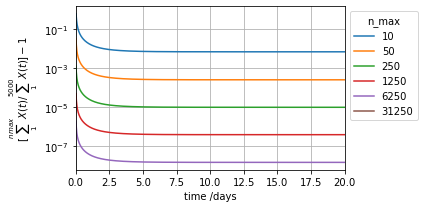

In [78]:
plt.figure(figsize=(6,3), facecolor='white')
for i in range(len(ys)):
    plt.plot(x/(24*3600),(ys[i]/ys[-1])-1,label='{}'.format(n_max[i]))
plt.legend(title = "n_max", bbox_to_anchor=(1.0,1.0), loc='upper left')
plt.xlim(0,20)
plt.yscale('log')
plt.xlabel('time /days')
plt.ylabel(r"[$\sum_1^{nmax} X(t) / \sum_1^{5000} X(t)] -1 $")
# plt.ylabel(r"$x + 3$")
plt.grid()
plt.tight_layout()
plt.savefig('/Users/williamquinn/Desktop/summation.png')

In [3]:
file = ROOT.TFile("/Users/williamquinn/Desktop/SNEMO/200320_A1400_B1400_t0929_output.root")

In [4]:
file.ls()

TFile**		/Users/williamquinn/Desktop/SNEMO/200320_A1400_B1400_t0929_output.root	
 TFile*		/Users/williamquinn/Desktop/SNEMO/200320_A1400_B1400_t0929_output.root	
  KEY: TH1D	200320_GAO607_charge_spectrum_1400V;1	200320_GAO607_charge_spectrum_1400V
  KEY: TH1D	200320_GAO607_amplitude_spectrum_1400V;1	200320_GAO607_amplitude_spectrum_1400V
  KEY: TH1D	200320_GAO607_baseline_distribution_1400V;1	200320_GAO607_baseline_distribution_1400V
  KEY: TH1I	200320_GAO607_apulse_num_1400V;1	200320_GAO607_apulse_num_1400V
  KEY: TH1I	200320_GAO607_apulse_times_1400V;1	200320_GAO607_apulse_times_1400V
  KEY: TH1D	200320_GAO607_apulse_amplitudes_1400V;1	200320_GAO607_apulse_amplitudes_1400V
  KEY: TH1I	200320_GAO607_he_apulse_num_1400V;1	200320_GAO607_he_apulse_num_1400V
  KEY: TH1D	200320_GAO607_he_apulse_amplitudes_1400V;1	200320_GAO607_he_apulse_amplitudes_1400V
  KEY: TH1D	200320_GAO612_charge_spectrum_1400V;1	200320_GAO612_charge_spectrum_1400V
  KEY: TH1D	200320_GAO612_amplitude_spectrum_1400V;1

In [5]:
h_times = file.Get("200320_GAO607_apulse_times_1400V")

In [6]:
x = []
y = []
for i in range(1, int(h_times.GetNbinsX())+1):
    x.append(i-1)
    y.append(h_times.GetBinContent(i))

In [7]:
new_x = []
new_y = []
j = 0
temp = 0
bin_width = 50
for i in range(len(x)):
    j += 1
    temp += y[i]
    if j == bin_width:
        j = 0
        new_x.append(x[i])
        new_y.append(temp)
        temp = 0

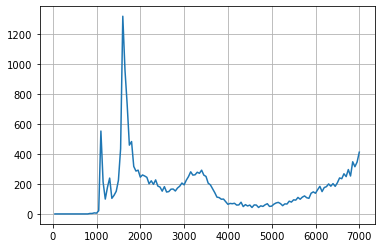

In [8]:
plt.plot(new_x, new_y)
plt.grid()

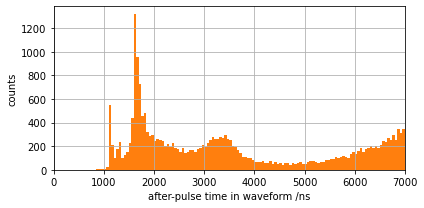

In [9]:
plt.figure(figsize=(6,3), facecolor='white')
plt.bar(np.array(new_x) + bin_width/2, new_y, width = bin_width, color='C1')
plt.grid()
plt.xlabel('after-pulse time in waveform /ns')
plt.ylabel('counts')
plt.xlim(0,7000)
plt.tight_layout()
plt.savefig("/Users/williamquinn/Desktop/apulse_times_example.png")

In [10]:
template_file = ROOT.TFile("/Users/williamquinn/Desktop/SNEMO/pmt_short_templates.root")
template_file.ls()

TFile**		/Users/williamquinn/Desktop/SNEMO/pmt_short_templates.root	
 TFile*		/Users/williamquinn/Desktop/SNEMO/pmt_short_templates.root	
  KEY: TH1D	Template_Ch0;1	Template_Ch0
  KEY: TH1D	Template_Ch1;1	Template_Ch1


In [11]:
h_template = template_file.Get("Template_Ch0")
x = []
y = []

for i in range(1, h_template.GetNbinsX()+1):
    x.append(i-1)
    y.append(h_template.GetBinContent(i))
    print(i, h_template.GetBinContent(i))

1 -217.99499999999978
2 -589.9949999999998
3 -1531.9949999999994
4 -4323.994999999999
5 -10492.994999999999
6 -20545.994999999977
7 -30571.995
8 -35233.99500000005
9 -32111.995000000035
10 -23645.994999999988
11 -14178.994999999995
12 -7388.995000000001
13 -4541.995000000001
14 -4761.994999999999
15 -5972.995000000003
16 -6514.994999999999
17 -5681.995000000001
18 -4103.994999999999
19 -2570.994999999999
20 -1473.9949999999994


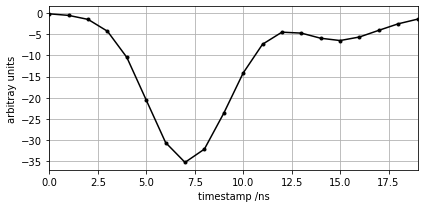

In [12]:
plt.figure(figsize=(6,3))
x = np.array(x)
y = np.array(y)
plt.plot(x,y/1000, 'k.-')
plt.ylabel('arbitray units')
plt.xlabel('timestamp /ns')
plt.grid()
plt.xlim(x[0], x[-1])
plt.tight_layout()
plt.savefig("/Users/williamquinn/Desktop/template.png")

In [3]:
def get_charge( waveform, baseline, peak_cell ):

    charge = 0.0
    resistance = 50.0
    integration = [0.1, 0.1]
    pre_trig = 500

    start,end = 0,0
    for i in range(pre_trig, peak_cell):
    
        if (waveform[i] - baseline) < (waveform[peak_cell] - baseline)*integration[0]:
            start = i
            break
        else:
            continue
    
    for i in range(peak_cell, waveform.size):
        if ( (waveform[i] - baseline) > (waveform[peak_cell] - baseline)*integration[1] ):
            end = i
            break
        else:
            continue

    for i in range(start,end):
        charge += (waveform[i] - baseline)
    return (-1.0)*charge/( resistance ), start, end

def get_charge_0( waveform, baseline, peak_cell ):

    charge = 0.0
    resistance = 50.0
    integration = [0.05, 0.05]
    pre_trig = 500
    start = peak_cell-15
    end= peak_cell+30
    for i in range(start,end):
        charge += (waveform[i] - baseline)
    return (-1.0)*charge/( resistance )

def get_baseline( waveform ):
    pre_trig = 500
    baseline = 0.0
    for i in range(0, pre_trig):
        baseline += waveform[i]
    
    return baseline/pre_trig


def get_peak_cell( waveform ):
    peak_cell = 0
    temp = waveform[0]
    for i in range(0, waveform.size):
        if ( waveform[i] < temp ):
            temp = waveform[i]
            peak_cell = i
    return peak_cell

def gaus(x, mu, sig, A):
    return A*np.exp(-(x - mu)**2/(2*(sig**2)))

def my_func(x, mu, sig, A, p1, p2, p3, p4):
    a = gaus(x, mu, sig, 7.08)
    b = gaus(x, mu*(1 + 72.144/975.651), sig*1.036, 1.84)
    c = gaus(x, mu*(1 + 84.154/975.651), sig*1.042, 0.44)
    d = p1*(np.exp(p2*x)/(1 + np.exp((x - p3)/p4)))  
    return A*(a+b+c) + d

def my_func_0(x, mu, sig, A):
    a = gaus(x, mu, sig, 7.08)
    b = gaus(x, mu*(1 + 72.144/975.651), sig*1.036, 1.84)
    c = gaus(x, mu*(1 + 84.154/975.651), sig*1.042, 0.44)
    return A*(a+b+c)
def comp(c, p1,p2,p3,p4):
    return p1*(np.exp(p2*(x))/(1 + np.exp((x - p3)/p4)))

In [13]:
canvas = ROOT.TCanvas()
h_template.Draw()
canvas.SaveAs("/Users/williamquinn/Desktop/test.png")

Info in <TCanvas::Print>: png file /Users/williamquinn/Desktop/test.png has been created


In [3]:
filename = "/Users/williamquinn/Desktop/res_data_ch0/201216/A1000_B1000_t1058_Ch1.xml"
date = filename.split("/")[-2]
channel = filename.split("/")[-1].split("_")[-1].split(".")[0]
f = open(filename, 'r')
fl = f.readlines()
waveforms = []
charges = []
charges_0 = []
j = 0
time_ = time.time()
for i, line in enumerate(fl):
    if '<trace channel=' in line:
        waveform = np.array(line.split('>')[-1].split(' '), dtype=int)
        waveforms.append(waveform)
        j += 1
        
        peak_cell = get_peak_cell(waveform)
        if peak_cell > 700:
            continue
        baseline = get_baseline(waveform)
        # charge, start, end = get_charge(waveform, baseline, peak_cell)
        charge_0 = get_charge_0(waveform, baseline, peak_cell)
        # charges.append(charge)
        charges_0.append(charge_0)
    
        if j % 10000 == 0:
            temp = time.time()
            print(j, 'events step =',temp - time_, 's')
            time_ = temp

10000 events step = 21.291884899139404 s
20000 events step = 21.471338987350464 s
30000 events step = 21.43105697631836 s
40000 events step = 21.504337787628174 s
50000 events step = 22.78838038444519 s
60000 events step = 21.92210078239441 s
70000 events step = 21.790519952774048 s
80000 events step = 22.549968004226685 s
90000 events step = 21.80884099006653 s


0.25


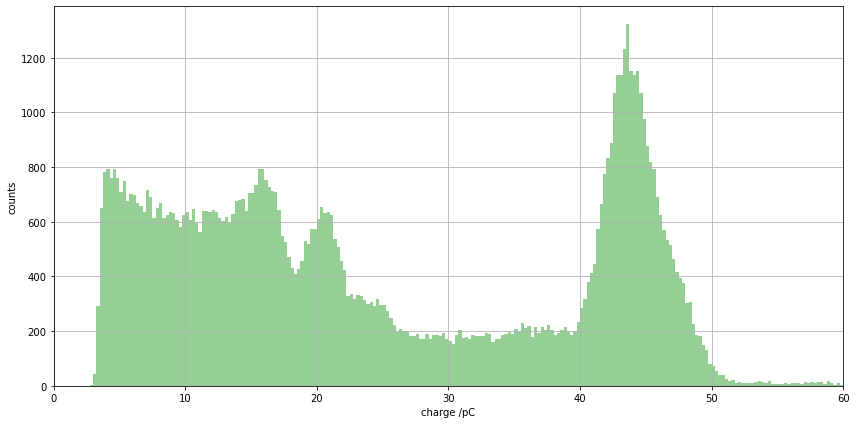

In [4]:
charges = np.array(charges)
charges_0 = np.array(charges_0)

max_charge = 60
min_charge = 0
n_bins = 240

freq, bin_edges = np.histogram(charges, bins=n_bins, range=[min_charge,max_charge])
bin_width = bin_edges[2] - bin_edges[1]
bin_centres = (bin_edges + bin_width/2)[:-1]

plt.figure(figsize=(12,6), facecolor='white')
#plt.bar(bin_centres, freq, width = bin_width, color='C1', alpha=0.5)

freq_0, bin_edges_0 = np.histogram(charges_0, bins=n_bins, range=[min_charge,max_charge])
bin_width_0 = bin_edges_0[2] - bin_edges_0[1]
print(bin_width)
bin_centres_0 = (bin_edges_0 + bin_width_0/2)[:-1]

plt.bar(bin_centres_0, freq_0, width = bin_width_0, color='C2', alpha=0.5)


plt.grid()
plt.xlabel('charge /pC')
plt.ylabel('counts')
plt.xlim(min_charge, max_charge)
plt.tight_layout()
#plt.savefig("/Users/williamquinn/Desktop/apulse_times_example.png")

43.443169226533364 1.7361847694248405 157.8984539661434 2.0701621947085806
 FCN=76.596 FROM MIGRAD    STATUS=CONVERGED     127 CALLS         128 TOTAL
                     EDM=2.49975e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  A            1.57898e+02   1.91669e+00  -1.06868e-05  -1.99005e-05
   2  mu           4.34432e+01   1.89288e-02  -3.44858e-07   6.78966e-04
   3  sigma        1.73618e+00   2.29558e-02   1.13468e-05   2.82929e-04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: bi_spectrum
Warning in <TROOT::Append>: Replacing existing TH1: 201216 (Potential memory leak).


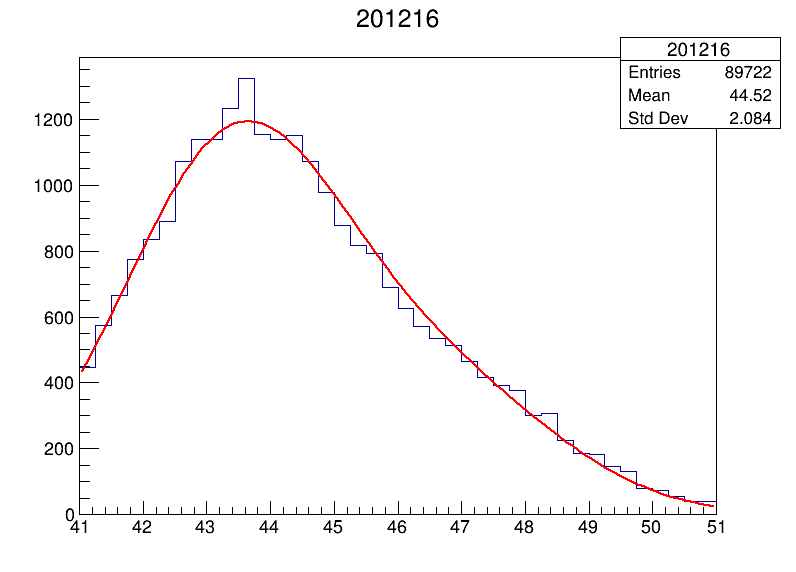

In [7]:
c = ROOT.TCanvas("bi_spectrum","Bi Spectrum",800,600)
lower = 41
higher = 51
low_bin = int(lower / bin_width_0)
high_bin = int(higher / bin_width_0)
hist = ROOT.TH1D(date, date, n_bins, min_charge, max_charge)

for i in range(len(charges_0)):
    hist.Fill(charges_0[i])
hist.GetXaxis().SetRangeUser(lower, higher)

fit = ROOT.TF1("fit",
                "[0]*"
                "(7.08*TMath::Gaus(x,[1],[2]) "
                " + 1.84*TMath::Gaus(x,[1]*(1 + 72.144/975.651),[2]*1.036) "
                " + 0.44*TMath::Gaus(x,[1]*(1 + 84.154/975.651),[2]*1.042)) ",
                lower, higher)

fit.SetParNames("A", "mu", "sigma")

fit.SetParLimits(0, 0, 400)
fit.SetParLimits(1, lower, higher)
fit.SetParLimits(2, 0.8, 10)
fit.SetParameters(319, (higher+lower)/2, 1.09)

hist.Fit("fit", "S", "", lower, higher)
hist.Draw()

c.Update()
c.Draw()

mu = fit.GetParameter(1)
mu_err = fit.GetParError(1)
sig = fit.GetParameter(2)
sig_err = fit.GetParError(2)
A = fit.GetParameter(0)
A_err = fit.GetParError(0)
chi = fit.GetChisquare()/fit.GetNDF()
print(mu, sig, A, chi)

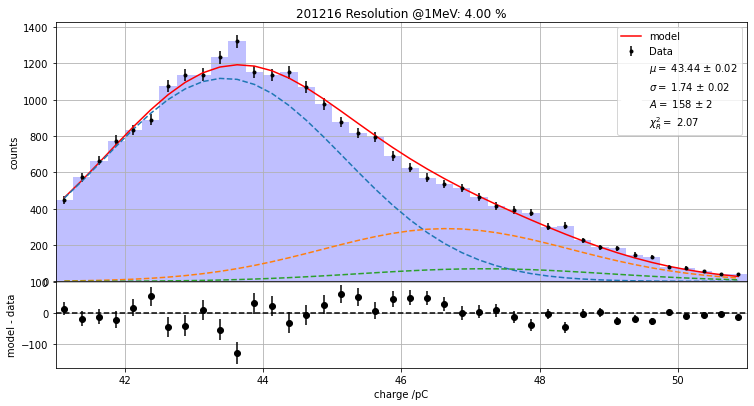

In [8]:
#PLOT
fig1 = plt.figure(figsize=(12,6), facecolor='white')
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.bar(bin_centres_0, freq_0, width = bin_width, color='b', alpha=0.25)
plt.errorbar(bin_centres_0[low_bin:high_bin], freq_0[low_bin:high_bin], yerr=np.sqrt(freq_0[low_bin:high_bin]), fmt='k.', label = 'Data')
plt.plot(bin_centres_0[low_bin:high_bin],
         my_func_0(bin_centres_0[low_bin:high_bin],mu, sig, A), 'r-',
         label = 'model')
plt.plot(bin_centres_0[low_bin:high_bin], gaus(bin_centres_0[low_bin:high_bin], mu, sig, A*7.08), '--')
plt.plot(bin_centres_0[low_bin:high_bin], gaus(bin_centres_0[low_bin:high_bin], mu*(1 + 72.144/975.651), sig*1.036, A*1.84), '--')
plt.plot(bin_centres_0[low_bin:high_bin], gaus(bin_centres_0[low_bin:high_bin], mu*(1 + 84.154/975.651), sig*1.042, A*0.44), '--')
plt.grid()
frame1.set_xticklabels([])

handles, labels = plt.gca().get_legend_handles_labels()
patch = matplotlib.patches.Patch(color='white', label=r'$\mu =$ {:.2f} ± {:.2f}'.format(mu, mu_err))
patch_1 = matplotlib.patches.Patch(color='white', label=r'$\sigma =$ {:.2f} ± {:.2f}'.format(sig, sig_err)) 
patch_2 = matplotlib.patches.Patch(color='white', label=r'$A =$ {:.0f} ± {:.0f}'.format(A, A_err)) 
patch_3 = matplotlib.patches.Patch(color='white', label=r'$\chi^2_R =$ {:.2f}'.format(chi)) 
handles.extend([patch, patch_1, patch_2, patch_3])
plt.legend(handles=handles, loc='upper right')


plt.ylabel('counts')
plt.xlim(lower, higher)
plt.title(date + ' Resolution @1MeV: {:.2f} %'.format(sig/mu * 100))

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))        
plt.errorbar(bin_centres_0[low_bin:high_bin],
             my_func_0(bin_centres_0[low_bin:high_bin],mu, sig, A) - freq_0[low_bin:high_bin],
             yerr= np.sqrt(freq_0[low_bin:high_bin]), fmt='ko')
plt.grid()
plt.xlim(lower, higher)
plt.xlabel('charge /pC')
plt.ylabel('model - data')
plt.axhline(0,ls = '--', color='black')
plt.savefig("/Users/williamquinn/Desktop/" + date + "_bi_spectrum_" + channel + ".pdf")

In [9]:
res = sig/mu
res_err = np.sqrt( (mu_err/mu)**2 + (sig_err/sig)**2 )
with open("/Users/williamquinn/Desktop/res_data_ch0/res_file_" + channel + ".csv", "a") as file:
    file.write("\n{},{},{},{},{},{},{},{}".format(date, mu, mu_err, sig, sig_err, res, res_err, chi))

In [5]:
channel = 'Ch0'
file = open("/Users/williamquinn/Desktop/res_data_ch0/res_file_" + channel + ".csv", 'r')
fl = file.readlines()

res_0 = []
res_err_0 = []
date_string_0 = []

for i, line in enumerate(fl):
    line_list = line.split(",")
    try:
        res_0.append(float(line_list[5].strip()))
        res_err_0.append(float(line_list[6].strip()))
        date_string_0.append(int(line_list[0].strip()))
    except:
        continue
res_0 = np.array(res_0)*100
res_err_0 = np.array(res_err_0)*res_0

channel = 'Ch1'
file = open("/Users/williamquinn/Desktop/res_data_ch0/res_file_" + channel + ".csv", 'r')
fl = file.readlines()

res_1 = []
res_err_1 = []
date_string_1 = []

for i, line in enumerate(fl):
    line_list = line.split(",")
    try:
        res_1.append(float(line_list[5].strip()))
        res_err_1.append(float(line_list[6].strip()))
        date_string_1.append(int(line_list[0].strip()))
    except:
        continue
res_1 = np.array(res_1)*100
res_err_1 = np.array(res_err_1)*res_1

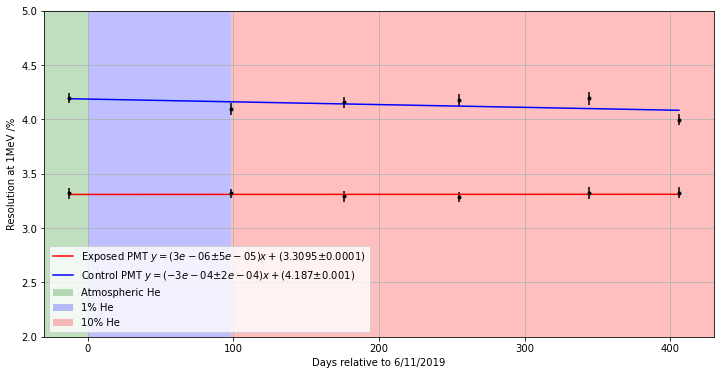

In [9]:
plt.figure(figsize=(12,6), facecolor='white')
dates = process_date(np.array(date_string_0))
def linear(x, m, c):
    return m*x + c
popt_0, pcov_0 = curve_fit(f=linear, xdata = dates - np.average(dates), ydata=res_0, sigma=res_err_0,
                      p0=[0,0])
c_0 = popt_0[1] - popt_0[0]*np.average(dates)
c_err_0 = np.sqrt( pcov_0[1, 1]**2 + np.average(dates)*pcov_0[0, 0]**2)

popt_1, pcov_1 = curve_fit(f=linear, xdata = dates - np.average(dates), ydata=res_1, sigma=res_err_1,
                      p0=[0,0])
c_1 = popt_1[1] - popt_1[0]*np.average(dates)
c_err_1 = np.sqrt( pcov_1[1, 1]**2 + np.average(dates)*pcov_1[0, 0]**2)

plt.errorbar(dates, res_0, yerr=res_err_0, fmt='k.')
plt.plot(dates, linear(dates, popt_0[0], c_0), 'r-',
         label=r'Exposed PMT $y = ({:.0e}±{:.0e})x + ({:.4f}±{:.4f})$'.format(popt_0[0], np.sqrt(pcov_0[0, 0]), c_0, c_err_0))

plt.errorbar(dates, res_1, yerr=res_err_1, fmt='k.')
plt.plot(dates, linear(dates, popt_1[0], c_1), 'b-',
         label=r'Control PMT $y = ({:.0e}±{:.0e})x + ({:.3f}±{:.3f})$'.format(popt_1[0], np.sqrt(pcov_1[0, 0]), c_1, c_err_1))

plt.ylim(2,5)

plt.grid()
plt.xlabel('Days relative to 6/11/2019')
plt.ylabel('Resolution at 1MeV /%')
plt.fill_between([-100, 0], [5 ,5], alpha=0.25,
                                 facecolor='green', label='Atmospheric He')
plt.fill_between([0, 98], [5 ,5], alpha=0.25,
                                 facecolor='blue', label='1% He')
plt.fill_between([98, 500], [5 ,5], alpha=0.25,
                                 facecolor='red', label='10% He')
plt.xlim(-30,430)
plt.legend()
plt.savefig("/Users/williamquinn/Desktop/res.pdf")
